# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

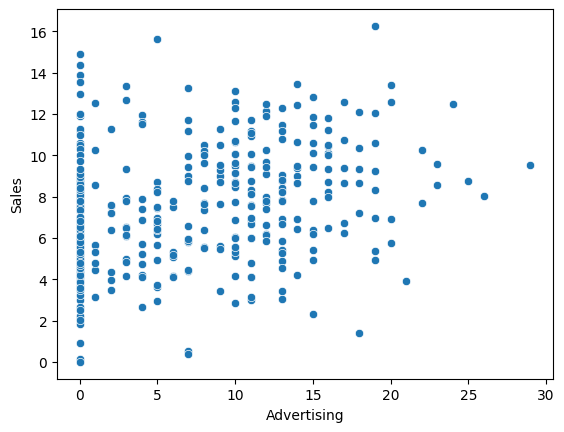

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

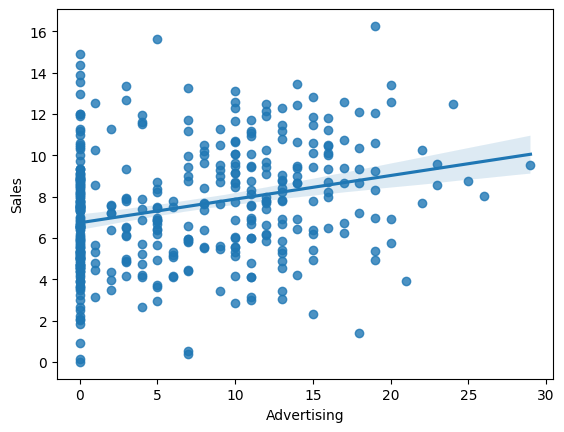

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

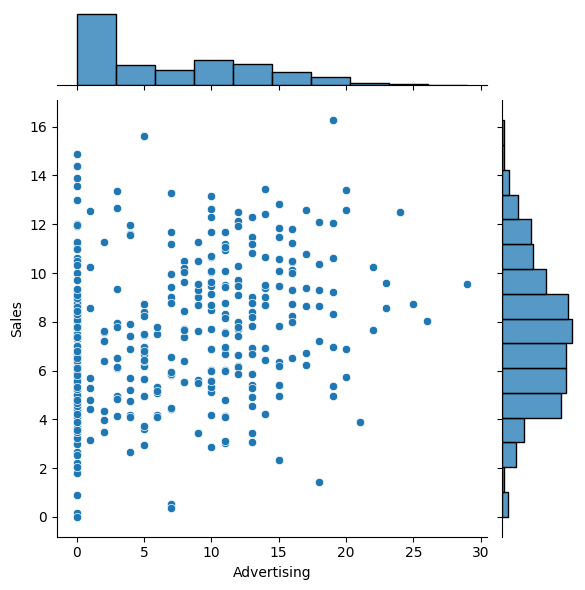

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [7]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

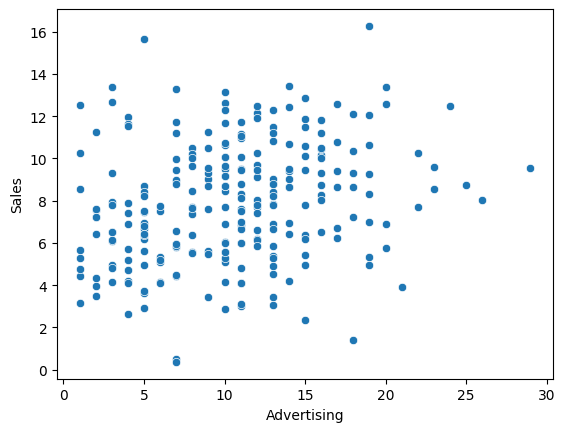

In [8]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [9]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

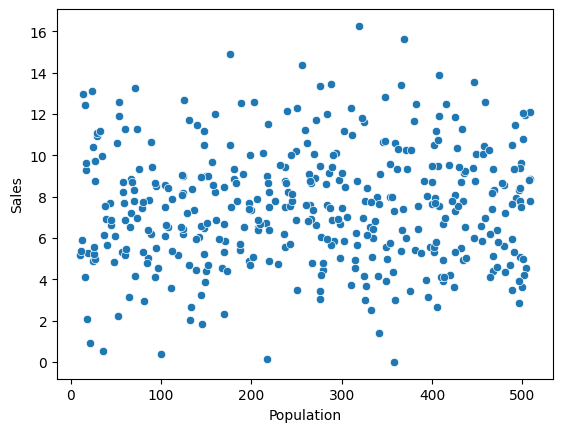

In [10]:
var = 'Population'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

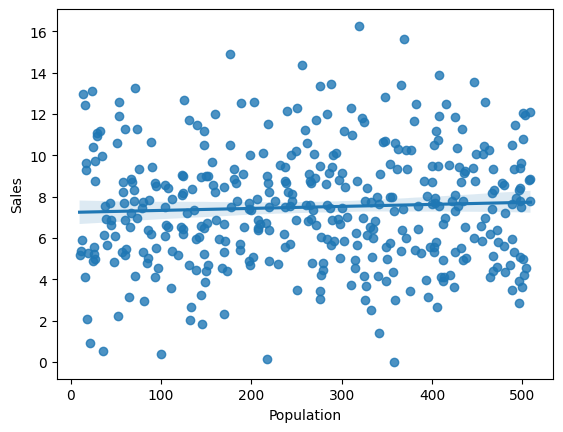

In [11]:
sns.regplot(x=var,y=target,data=data)
plt.show()

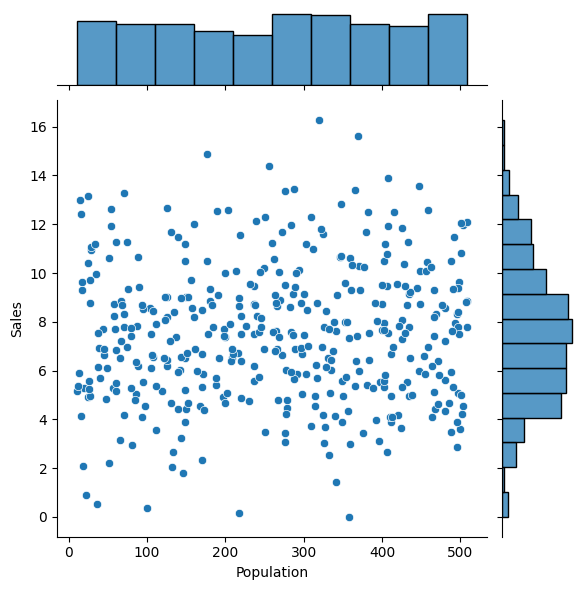

In [13]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [15]:
r_2, p_value = spst.pearsonr(data[var],data[target])
print(f'상관계수: {r_2}, p-value: {p_value}')

상관계수: 0.0504709844720392, p-value: 0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 인구와 판매는 상관이 없어보이고 선형 관계도 없어 보인다 p-value도 0.31이어서 관계가 없는 것 같음

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

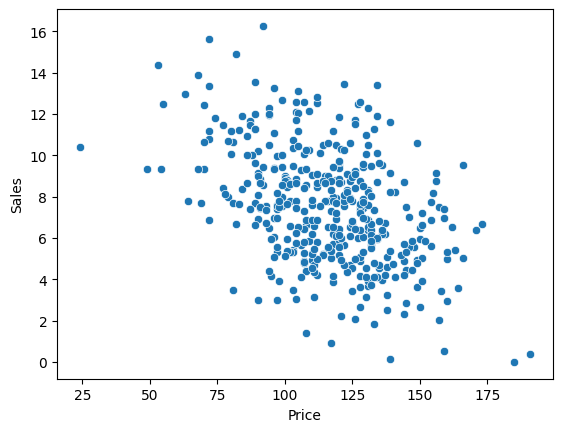

In [16]:
var = 'Price'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

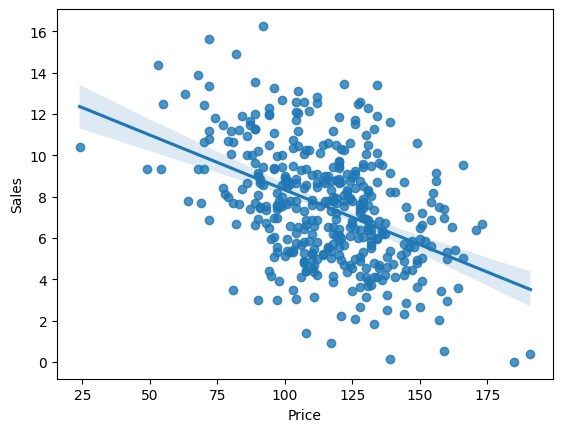

In [17]:
sns.regplot(x=var,y=target,data=data)
plt.show()

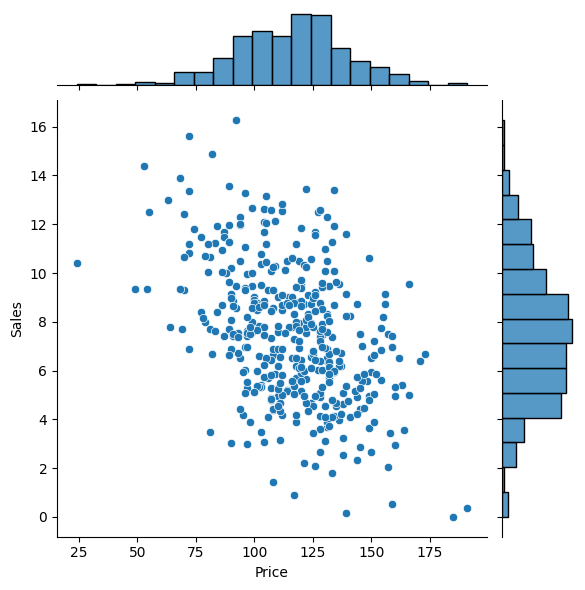

In [18]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [19]:
r_2, p_value = spst.pearsonr(data[var],data[target])
print(f'상관계수: {r_2}, p-value: {p_value}')

상관계수: -0.4449507278465726, p-value: 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- 상관계수가 음수이므로 가격과 판매량 관계는 반비례 관계이고 p-value가 0에 수렴하기 때문에 유의미한 관계라고 볼 수 있다

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

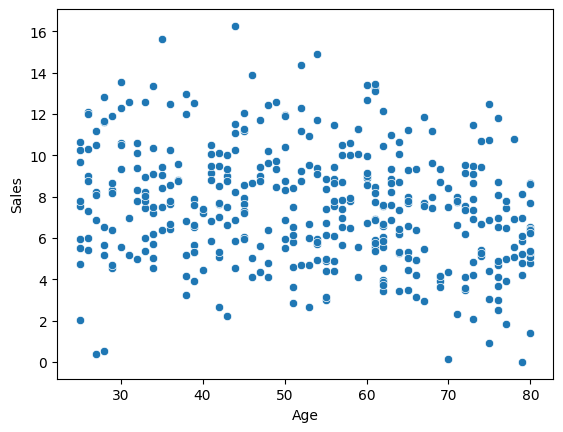

In [20]:
var = 'Age'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

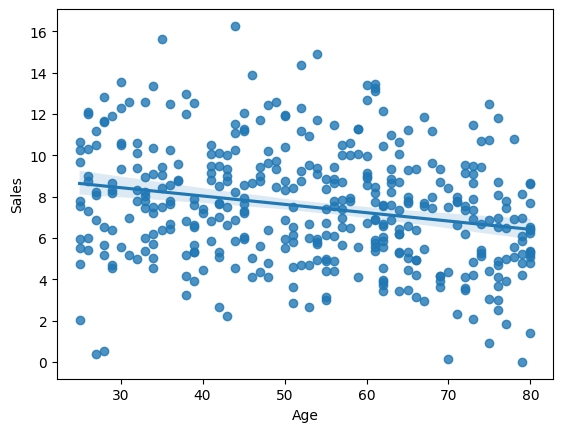

In [21]:
sns.regplot(x=var,y=target,data=data)
plt.show()

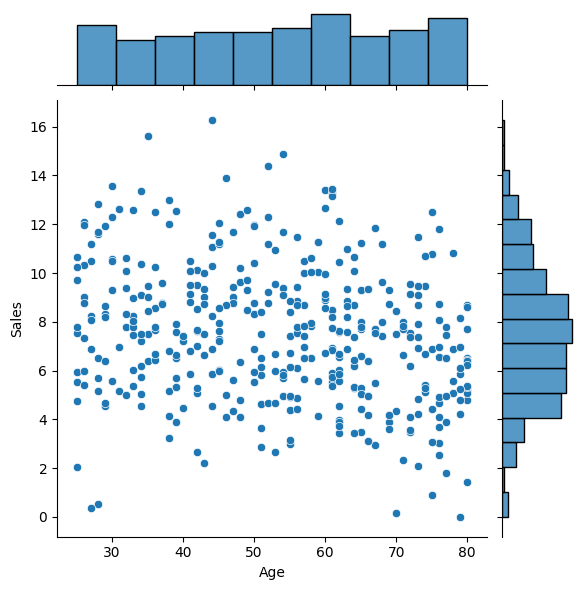

In [22]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [23]:
r_2, p_value = spst.pearsonr(data[var],data[target])
print(f'상관계수: {r_2}, p-value: {p_value}')

상관계수: -0.2318154396045765, p-value: 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- age와 sales는 음의 선형관계가 있고 p-값이 매우 작기 때문에 통계젹으로 유의미하다

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

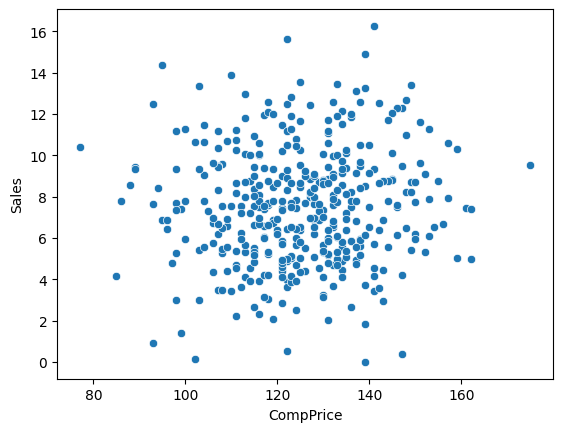

In [24]:
var = 'CompPrice'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

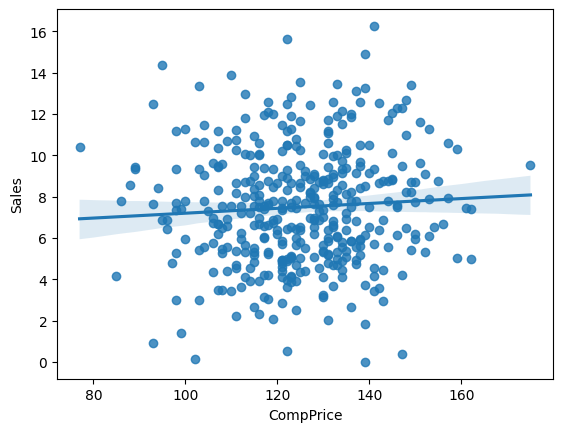

In [25]:
sns.regplot(x=var,y=target,data=data)
plt.show()

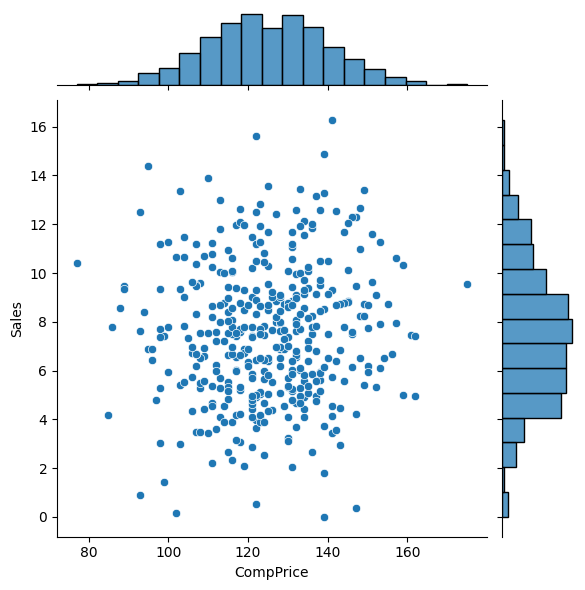

In [26]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [27]:
r_2, p_value = spst.pearsonr(data[var],data[target])
print(f'상관계수: {r_2}, p-value: {p_value}')

상관계수: 0.06407872955062152, p-value: 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- compprice와 sales의 사이에 선형관계와 상관관계가 없어 보임

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

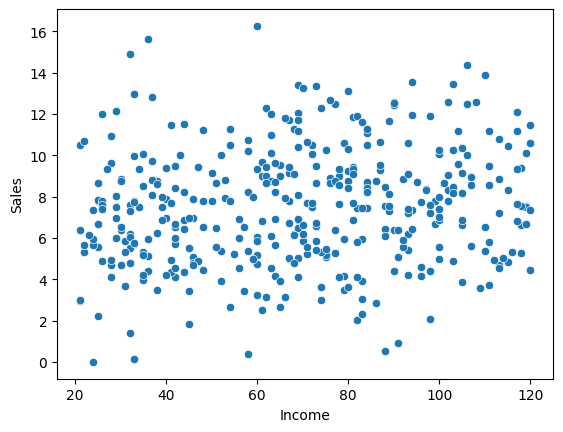

In [28]:
var = 'Income'

sns.scatterplot(x=var,y=target,data=data)
plt.show()

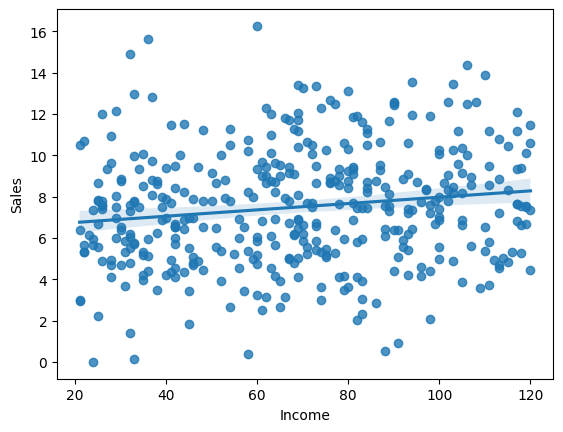

In [29]:
sns.regplot(x=var,y=target,data=data)
plt.show()

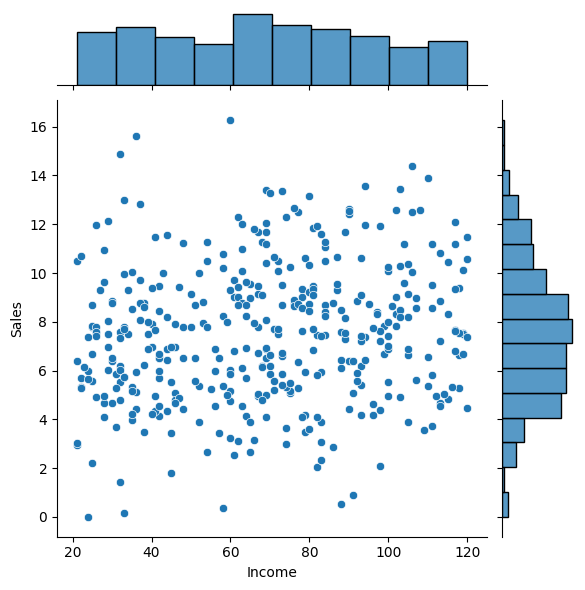

In [30]:
sns.jointplot(x=var,y=target,data=data)
plt.show()

2) 수치화 : 상관분석

In [31]:
r_2, p_value = spst.pearsonr(data[var],data[target])
print(f'상관계수: {r_2}, p-value: {p_value}')

상관계수: 0.15195097946754424, p-value: 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- income과 sales 관계는 약한 양의 관계이지만 p-값이 작아 통계적으로 유의미하다

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

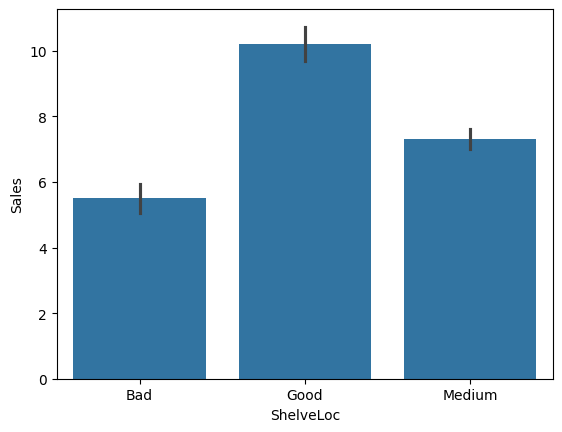

In [32]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [33]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- F-통계량이 매우 큰 값으로 이는 그룹 간의 평균 차이가 상당히 크다는 것을 의미하고 p-값도 작기 때문에 통계적으로 유의미하다

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

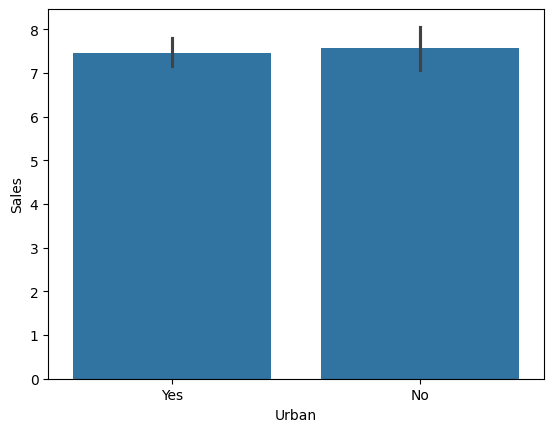

In [38]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [39]:
ur_y = data.loc[data[var]=='Yes', target]
ur_n = data.loc[data[var]=='No', target]

spst.ttest_ind(ur_y,ur_n)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- t-통계량은 0에 매우 가까워 이는 두 그룹의 평균 차이가 거의 없고 p-값도 0.05보다 훨씬 크므로 통계적으로 유의미하지 않음

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

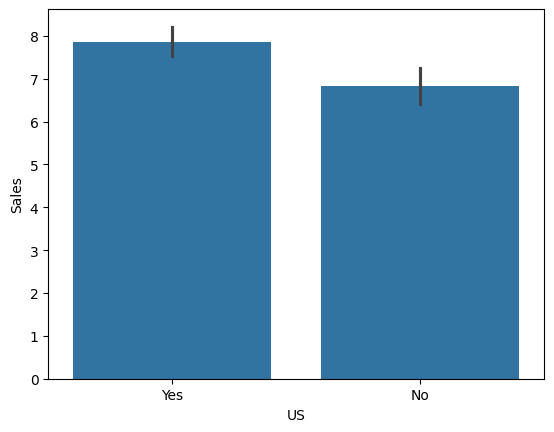

In [40]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [41]:
u_y = data.loc[data[var]=='Yes', target]
u_n = data.loc[data[var]=='No', target]

spst.ttest_ind(u_y,u_n)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

- t-통계량은 큰 값으로 이는 두 그룹의 평균 차이가 통계적으로 유의미하게 다르고 p-값도 작기 때문에 통계적으로 유의미하다

## **4.관계 정리하기**

① 강한관계

- price_diff, shelveloc

② 중간관계

- price, income, age, us, advertising

③ 관계없음

- population, compprice, urban